# Learning Rate ka Effect - Gradient Descent Path Visualization

Is notebook me hum dekhenge ki different learning rates ka kya effect hota hai gradient descent path pe jab hum sirf intercept optimize kar rahe hain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.animation as animation
from IPython.display import HTML

## Data Generation - Sample data banate hain

True slope (m): 45.71
True intercept (b): 4.79


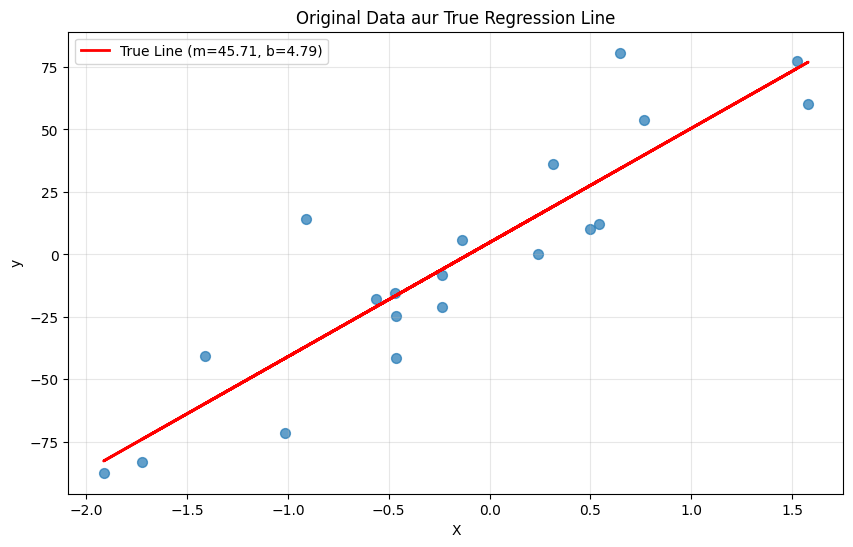

In [2]:
# Simple dataset banate hain
X, y = make_regression(n_samples=20, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=42)

# True solution nikal lete hain OLS se
lr_true = LinearRegression()
lr_true.fit(X, y)
true_slope = lr_true.coef_[0]
true_intercept = lr_true.intercept_

print(f"True slope (m): {true_slope:.2f}")
print(f"True intercept (b): {true_intercept:.2f}")

# Data plot karte hain
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, s=50)
plt.plot(X, lr_true.predict(X), 'r-', linewidth=2, label=f'True Line (m={true_slope:.2f}, b={true_intercept:.2f})')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data aur True Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Cost Function aur Gradient Calculation

Yahan hum cost function define karte hain aur intercept ke liye gradient calculate karte hain.

In [3]:
def calculate_cost(X, y, m, b):
    """
    Mean Squared Error cost function
    """
    n = len(y)
    predictions = m * X.ravel() + b
    cost = (1/n) * np.sum((y - predictions)**2)
    return cost

def calculate_gradient_intercept(X, y, m, b):
    """
    Intercept ke liye gradient calculate karta hai
    """
    n = len(y)
    predictions = m * X.ravel() + b
    gradient = (-2/n) * np.sum(y - predictions)
    return gradient

## Different Learning Rates ke saath Gradient Descent

Ab hum multiple learning rates test karenge aur dekhenege ki har ek ka path kaisa hota hai.

In [4]:
def gradient_descent_intercept_only(X, y, m_fixed, learning_rate, epochs, initial_b=-50):
    """
    Sirf intercept optimize karta hai, slope fixed rakhta hai
    """
    b = initial_b
    b_history = [b]
    cost_history = [calculate_cost(X, y, m_fixed, b)]
    
    for i in range(epochs):
        gradient_b = calculate_gradient_intercept(X, y, m_fixed, b)
        b = b - learning_rate * gradient_b
        
        b_history.append(b)
        cost_history.append(calculate_cost(X, y, m_fixed, b))
    
    return b_history, cost_history

# Different learning rates test karte hain
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
epochs = 50
m_fixed = true_slope  # slope ko true value pe fix rakhte hain

results = {}
colors = ['blue', 'green', 'orange', 'red', 'purple']

for i, lr in enumerate(learning_rates):
    b_hist, cost_hist = gradient_descent_intercept_only(X, y, m_fixed, lr, epochs)
    results[lr] = {
        'b_history': b_hist,
        'cost_history': cost_hist,
        'color': colors[i]
    }
    print(f"Learning Rate {lr}: Final intercept = {b_hist[-1]:.4f}, Final cost = {cost_hist[-1]:.4f}")

Learning Rate 0.001: Final intercept = -44.7815, Final cost = 2893.8204
Learning Rate 0.01: Final intercept = -15.1656, Final cost = 834.9672
Learning Rate 0.1: Final intercept = 4.7849, Final cost = 436.9130
Learning Rate 0.5: Final intercept = 4.7857, Final cost = 436.9130
Learning Rate 1.0: Final intercept = -50.0000, Final cost = 3438.3875


## Cost Function Convergence Visualization

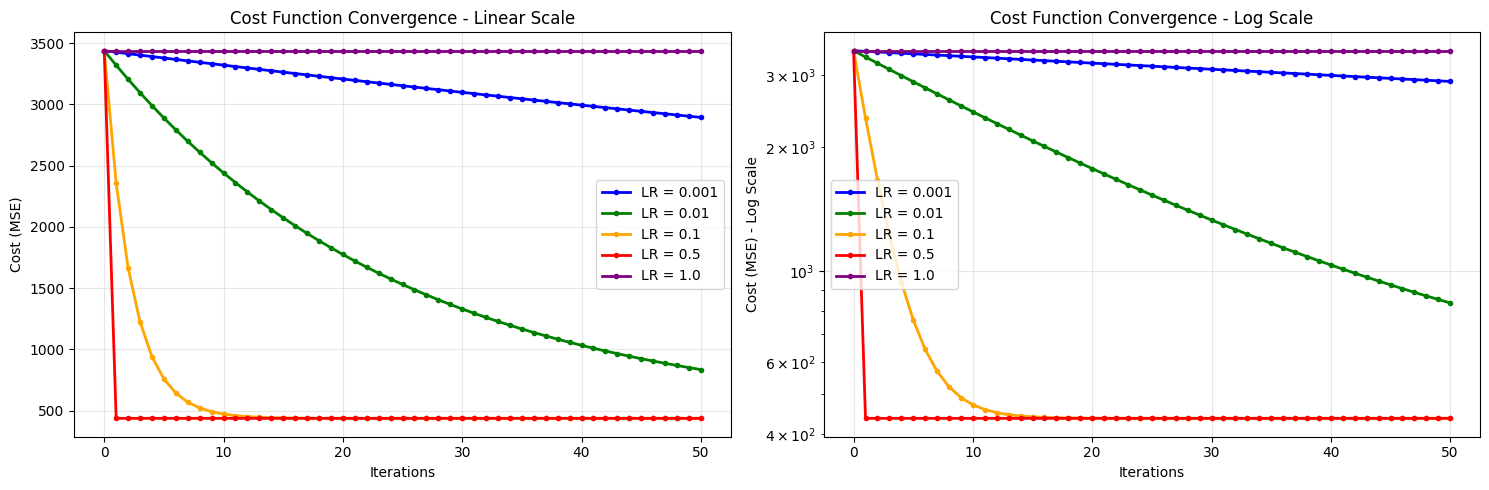

In [5]:
# Cost function convergence plot
plt.figure(figsize=(15, 5))

# Linear scale
plt.subplot(1, 2, 1)
for lr in learning_rates:
    cost_hist = results[lr]['cost_history']
    color = results[lr]['color']
    plt.plot(range(len(cost_hist)), cost_hist, color=color, linewidth=2, 
             label=f'LR = {lr}', marker='o', markersize=3)

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Convergence - Linear Scale')
plt.legend()
plt.grid(True, alpha=0.3)

# Log scale for better visualization
plt.subplot(1, 2, 2)
for lr in learning_rates:
    cost_hist = results[lr]['cost_history']
    color = results[lr]['color']
    plt.semilogy(range(len(cost_hist)), cost_hist, color=color, linewidth=2, 
                 label=f'LR = {lr}', marker='o', markersize=3)

plt.xlabel('Iterations')
plt.ylabel('Cost (MSE) - Log Scale')
plt.title('Cost Function Convergence - Log Scale')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Intercept Path Visualization

Yahan hum intercept ki journey dekhte hain different learning rates ke saath.

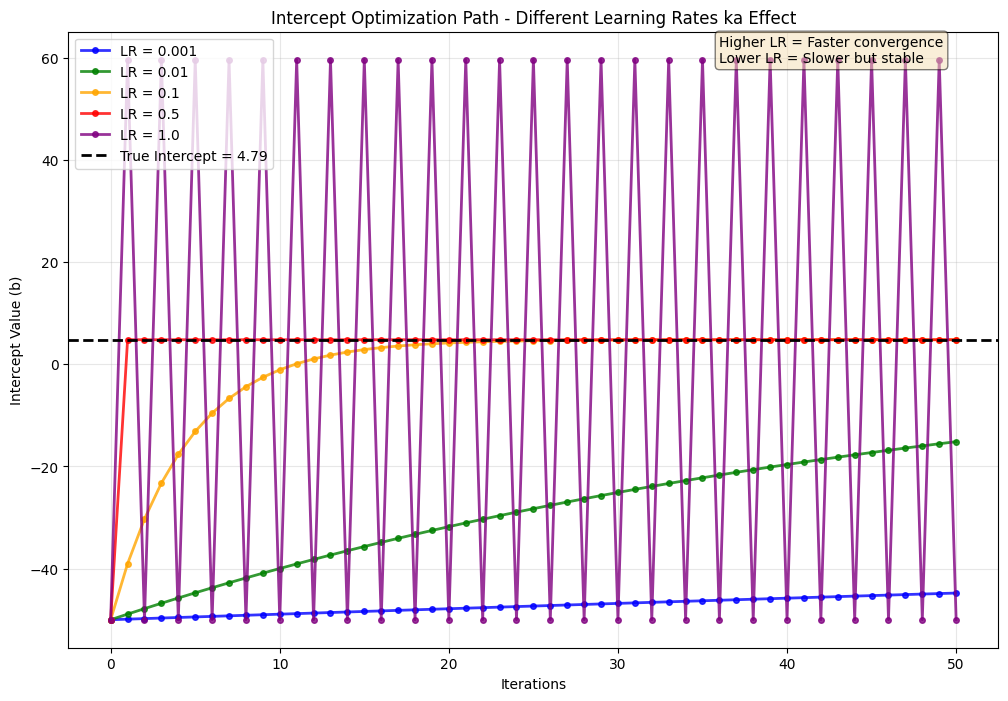

In [6]:
# Intercept convergence path
plt.figure(figsize=(12, 8))

for lr in learning_rates:
    b_hist = results[lr]['b_history']
    color = results[lr]['color']
    
    plt.plot(range(len(b_hist)), b_hist, color=color, linewidth=2, 
             label=f'LR = {lr}', marker='o', markersize=4, alpha=0.8)

# True intercept line
plt.axhline(y=true_intercept, color='black', linestyle='--', linewidth=2, 
            label=f'True Intercept = {true_intercept:.2f}')

plt.xlabel('Iterations')
plt.ylabel('Intercept Value (b)')
plt.title('Intercept Optimization Path - Different Learning Rates ka Effect')
plt.legend()
plt.grid(True, alpha=0.3)

# Annotation for better understanding
plt.text(0.7, 0.95, 'Higher LR = Faster convergence\nLower LR = Slower but stable', 
         transform=plt.gca().transAxes, fontsize=10, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

## Regression Line Evolution Visualization

Ab dekhte hain ki regression line kaise evolve hoti hai different learning rates ke saath.

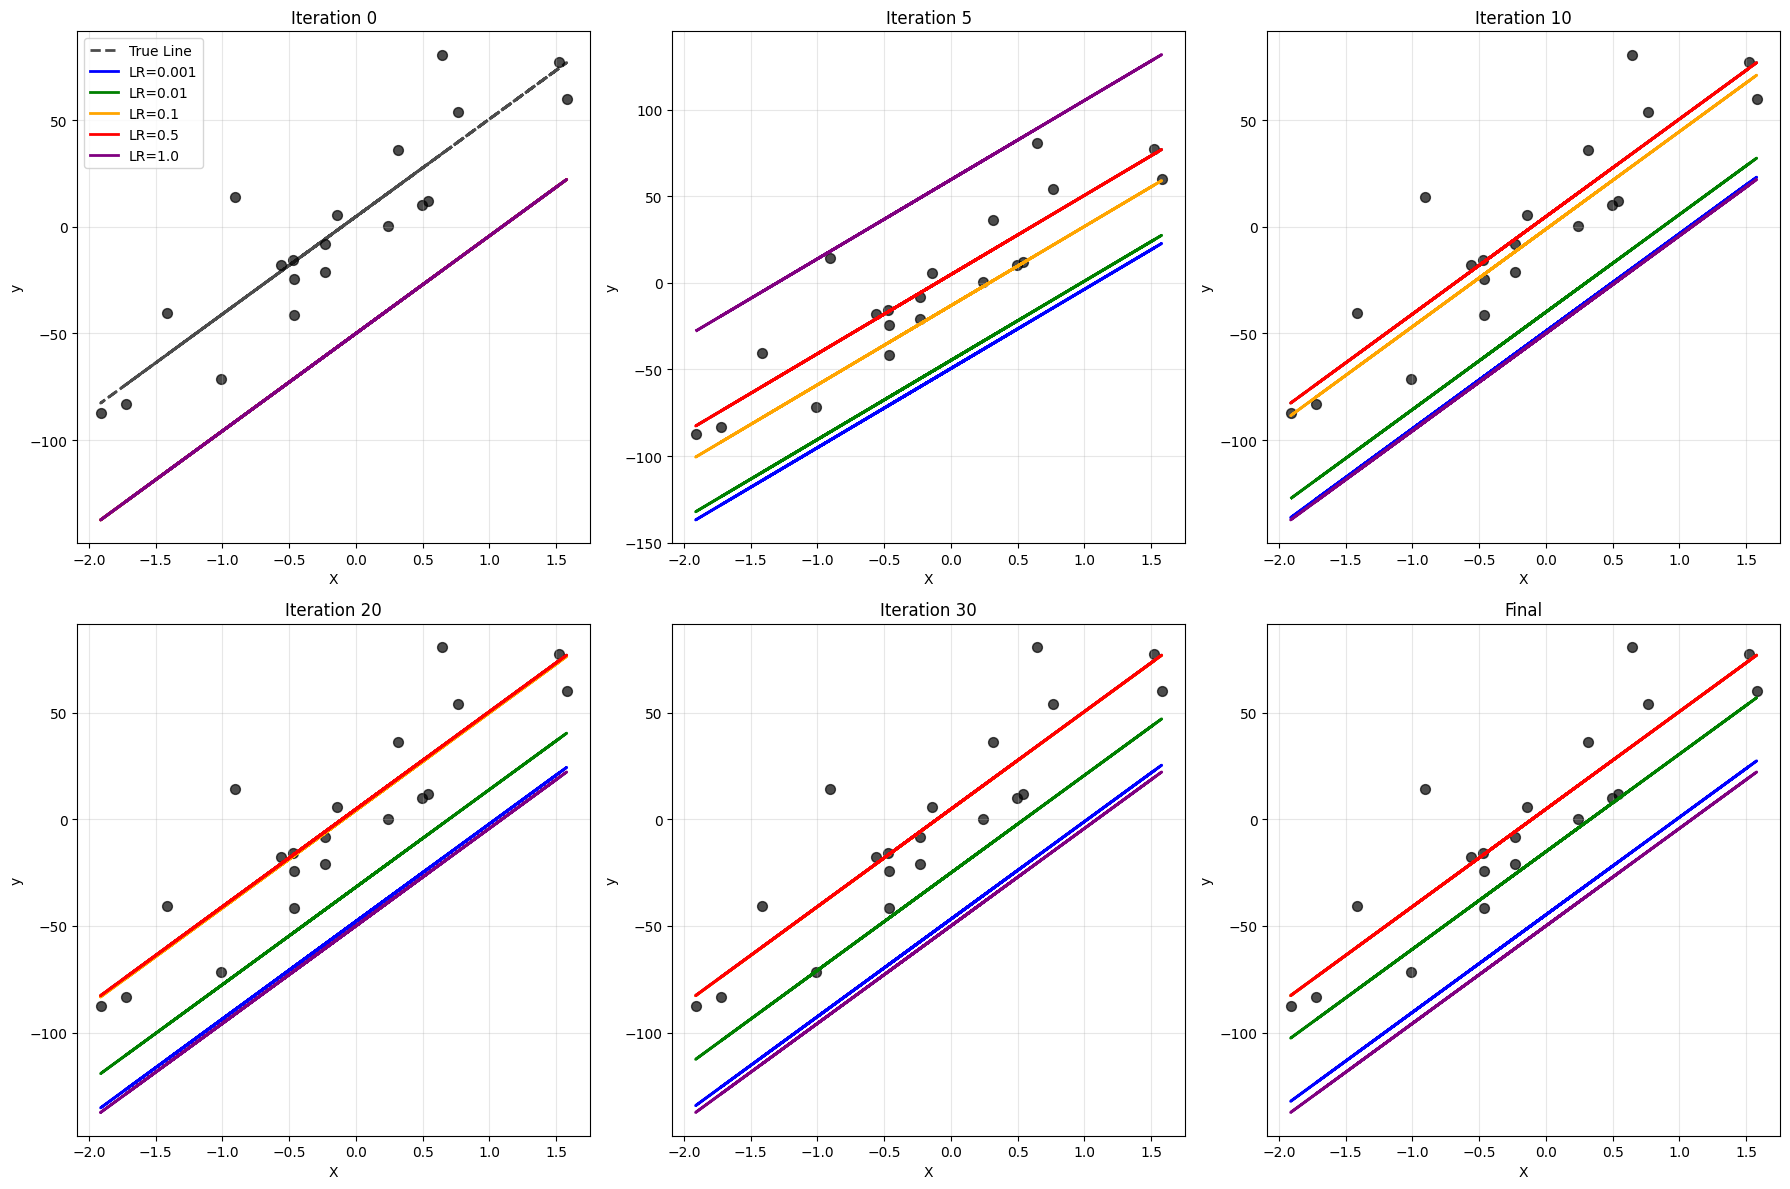

In [7]:
# Show how regression lines evolve
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

iterations_to_show = [0, 5, 10, 20, 30, -1]  # -1 means final

for idx, iter_num in enumerate(iterations_to_show):
    ax = axes[idx]
    
    # Data points
    ax.scatter(X, y, alpha=0.7, s=50, color='black')
    
    # True line
    ax.plot(X, lr_true.predict(X), 'k--', linewidth=2, alpha=0.7, label='True Line')
    
    # Lines for different learning rates
    for lr in learning_rates:
        b_hist = results[lr]['b_history']
        color = results[lr]['color']
        
        if iter_num == -1:
            b_current = b_hist[-1]
            title_iter = 'Final'
        else:
            if iter_num < len(b_hist):
                b_current = b_hist[iter_num]
            else:
                b_current = b_hist[-1]
            title_iter = f'Iteration {iter_num}'
        
        y_pred = m_fixed * X.ravel() + b_current
        ax.plot(X, y_pred, color=color, linewidth=2, label=f'LR={lr}')
    
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'{title_iter}')
    ax.grid(True, alpha=0.3)
    
    if idx == 0:
        ax.legend()

plt.tight_layout()
plt.show()

## Learning Rate ka Analysis

Ab summary dekhte hain ki different learning rates ka kya effect hua.

In [8]:
# Analysis table
print("\n" + "="*80)
print("LEARNING RATE ANALYSIS - SUMMARY")
print("="*80)
print(f"{'LR':<8} {'Initial Cost':<12} {'Final Cost':<12} {'Iterations to Converge':<20} {'Final Error':<12}")
print("-"*80)

convergence_threshold = 0.01  # 1% change threshold

for lr in learning_rates:
    cost_hist = results[lr]['cost_history']
    b_hist = results[lr]['b_history']
    
    initial_cost = cost_hist[0]
    final_cost = cost_hist[-1]
    final_error = abs(b_hist[-1] - true_intercept)
    
    # Find convergence point
    converged_at = len(cost_hist) - 1
    for i in range(1, len(cost_hist)):
        if abs(cost_hist[i] - cost_hist[i-1]) / cost_hist[i-1] < convergence_threshold:
            converged_at = i
            break
    
    print(f"{lr:<8} {initial_cost:<12.4f} {final_cost:<12.4f} {converged_at:<20} {final_error:<12.4f}")

print("\n" + "="*80)
print("KEY OBSERVATIONS:")
print("• Higher Learning Rate = Faster convergence but risk of overshooting")
print("• Lower Learning Rate = Slower convergence but more stable")
print("• Sweet spot = Balance between speed and stability")
print(f"• True intercept value = {true_intercept:.4f}")
print("="*80)


LEARNING RATE ANALYSIS - SUMMARY
LR       Initial Cost Final Cost   Iterations to Converge Final Error 
--------------------------------------------------------------------------------
0.001    3438.3875    2893.8204    1                    49.5672     
0.01     3438.3875    834.9672     50                   19.9513     
0.1      3438.3875    436.9130     14                   0.0008      
0.5      3438.3875    436.9130     2                    0.0000      
1.0      3438.3875    3438.3875    1                    54.7857     

KEY OBSERVATIONS:
• Higher Learning Rate = Faster convergence but risk of overshooting
• Lower Learning Rate = Slower convergence but more stable
• Sweet spot = Balance between speed and stability
• True intercept value = 4.7857


## Interactive Animation (Optional)

Agar aap animation dekhna chahte hain to ye cell run kar sakte hain.

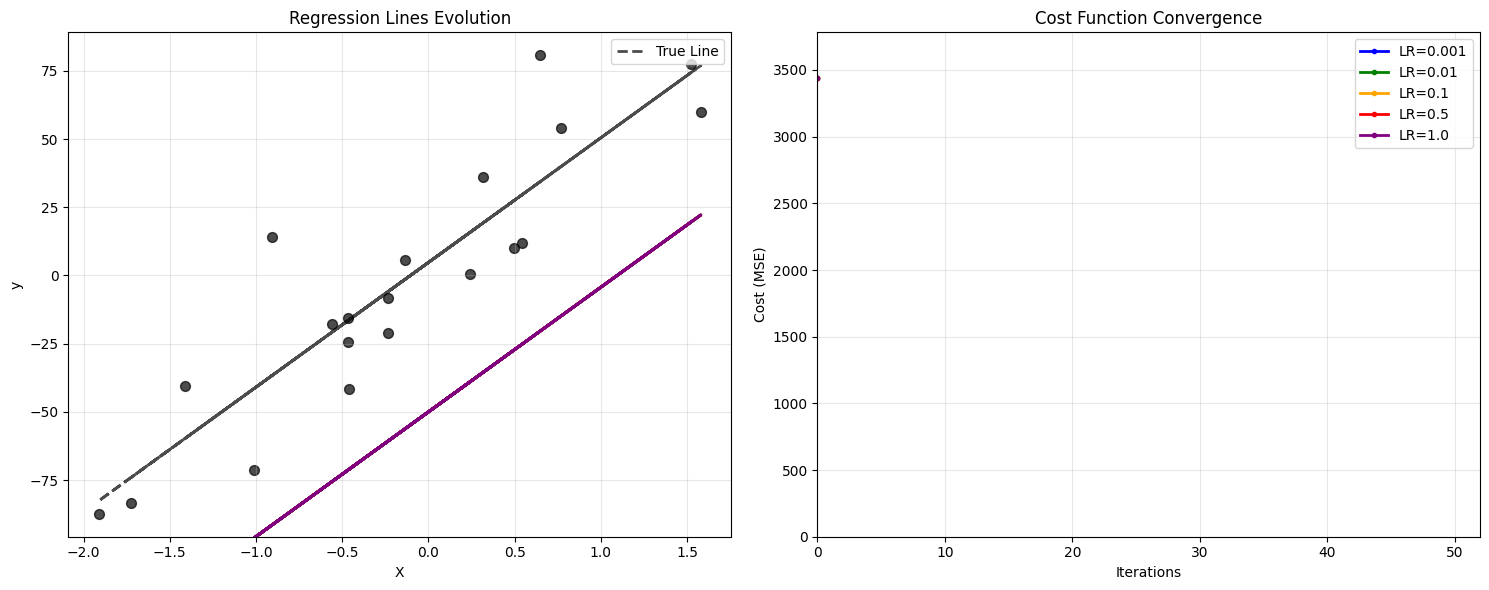

In [10]:
# Animation function (run kariye agar animation dekhni hai)
def create_animation():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Setup for regression lines plot
    ax1.scatter(X, y, alpha=0.7, s=50, color='black')
    ax1.plot(X, lr_true.predict(X), 'k--', linewidth=2, alpha=0.7, label='True Line')
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.set_title('Regression Lines Evolution')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    # Setup for cost function plot
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Cost (MSE)')
    ax2.set_title('Cost Function Convergence')
    ax2.grid(True, alpha=0.3)
    
    lines1 = {}  # For regression lines
    lines2 = {}  # For cost function lines
    
    for lr in learning_rates:
        color = results[lr]['color']
        line1, = ax1.plot([], [], color=color, linewidth=2, label=f'LR={lr}')
        line2, = ax2.plot([], [], color=color, linewidth=2, label=f'LR={lr}', marker='o', markersize=3)
        lines1[lr] = line1
        lines2[lr] = line2
    
    ax2.legend()
    
    def animate(frame):
        for lr in learning_rates:
            b_hist = results[lr]['b_history']
            cost_hist = results[lr]['cost_history']
            
            if frame < len(b_hist):
                # Update regression line
                b_current = b_hist[frame]
                y_pred = m_fixed * X.ravel() + b_current
                lines1[lr].set_data(X.ravel(), y_pred)
                
                # Update cost function
                x_data = list(range(frame + 1))
                y_data = cost_hist[:frame + 1]
                lines2[lr].set_data(x_data, y_data)
        
        # Update y-limits for cost plot
        if frame > 0:
            all_costs = []
            for lr in learning_rates:
                all_costs.extend(results[lr]['cost_history'][:frame + 1])
            if all_costs:
                ax2.set_ylim(0, max(all_costs) * 1.1)
                ax2.set_xlim(0, frame + 2)
        
        return list(lines1.values()) + list(lines2.values())
    
    max_frames = max(len(results[lr]['b_history']) for lr in learning_rates)
    ani = animation.FuncAnimation(fig, animate, frames=max_frames, 
                                  interval=200, blit=False, repeat=True)
    
    plt.tight_layout()
    return ani

# Uncomment next line to see animation
ani = create_animation()
HTML(ani.to_jshtml())

## Conclusion

Is notebook se humne ye dekha:

1. **High Learning Rate (1.0, 0.5)**: Bahut jaldi converge hota hai lekin sometimes overshooting ka risk hota hai
2. **Medium Learning Rate (0.1)**: Good balance between speed aur stability
3. **Low Learning Rate (0.01, 0.001)**: Slow convergence lekin very stable

**Key Takeaway**: Learning rate choose karna ek trade-off hai speed aur stability ke beech. Real projects me cross-validation use karke optimal learning rate find karte hain.